<h1 style="text-align:center">Advanced Statistical Inference</h1>
<h1 style="text-align:center">Bayesian Logistic Regression - Metropolis-Hastings</h1>



## 1. Aims
<div class="alert alert-info">
<ul> 
<li> To implement the MH algorithm.
<li> To use it to compute classification probabilities.
</ul>
</div>

## 2. Metropolis-Hastings
<div class="alert alert-info">
In this lab, youâ€™re going to implement the Metropolis-Hasting algorithm described in the lecture.
Use the binary classification data `binaryclass2.mat` and the function `laplacecomp()`. If you
pass this function a 2-dimensional $w$ vector, it will return $g(w; X, t, \sigma^2)$ and $log(g(w; X, t, \sigma^2))$.
(Remember that $g(w; X, t, \sigma^2) \propto p(w|X, t, \sigma^2)$, the posterior density of interest.)
</div>

In [31]:
import scipy.io
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
mat = scipy.io.loadmat('binaryclass2.mat')

In [3]:
X = mat['X']
t = mat['t']

<div class="alert alert-info">
Visualise the data using a scatter plot.
</div>

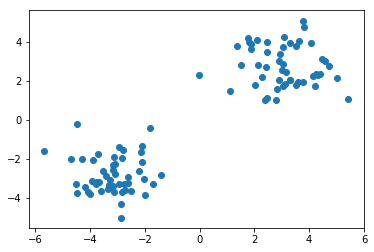

In [4]:
plt.scatter(X[:,0],X[:,1])

<div class="alert alert-info">
Make sure `laplacecomp()` works by passing it some different $w$ vectors ($w$ needs to have
dimension 2Ã—1).</div>

In [5]:
def laplacecomp(w,X,t):
    """This function computes g and log(g) for the laplace model introduced in the lecture."""
    w = np.array(w)
    X = np.array(X)
    t = np.array(t)
    ss = 10 # Prior variance (sigma squared)
    # Evaluate log prior
    log_g = -(1/(2*ss))*w.T.dot(w)
    # Compute P
    P = 1/(1+np.exp(-X.dot(w)))
    log_l = np.sum(t*np.log(P) + (1-t)*(np.log(1-P)))
    log_g = log_g + log_l
    g = np.exp(log_g)
    return g[0][0], log_g[0][0]

In [14]:
w = np.array([[4],[-1]])
g,log_g = laplacecomp(w,X,t)
print(g)

0.020472450832929995


<div class="alert alert-info">

Implement the MH algorithm (see the flowchart in the slides). 
<br>
You might find it safest to work with $log(g)$ â€“ the ratio then becomes a subtraction that must then be exponentiated. This has more numerical stability, especially when $w$ isnâ€™t very good. You can start with any value of $w$. E.g., $w = randn(2,1)$. Also, use a Gaussian proposal: For example: $wp = randn(2,1)*0.5+w$ where $w$ is the current sample and $wp$ is the proposal and the Gaussian has standard deviation $0.5$ (set this as you please).
</div>

In [22]:
def MH(X, t, numSamples):
    w_samples = []
    cov_mat = [[1,0],[0,1]]
    w = np.random.randn(2,1)
    r = np.zeros(2)
    _,p = laplacecomp(w,X,t)
    for i in range(numSamples):
        wp= np.random.randn(2,1) * 0.5 + w
        _,pn = laplacecomp(wp,X,t)
        
        if(pn > p):
            w_samples.append(wp)
            p = pn
            w = wp
        else:
            u = np.random.rand()
            if(u < pn/p):
                w_samples.append(wp)
                p = pn
                w = wp
        
    return w_samples



[array([[-0.92259609],
        [-1.19073276]]), array([[-1.37787013],
        [-1.33801414]])]

<div class="alert alert-info">
Draw samples from your MH algorithm and plot the distribution of values obtained.
</div>

In [29]:
numSamples = 10000
w_samples = MH(X,t, numSamples)
x = np.array(w_samples).reshape(len(w_samples),2)

/home/marius/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/marius/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/marius/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


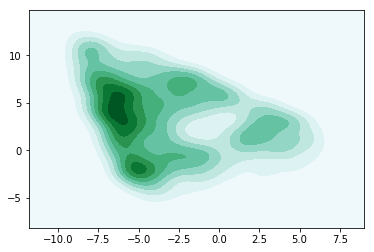

In [34]:
sns.kdeplot(x[:,0],x[:,1],shade=True)

<div class="alert alert-info">
Compute the probability $P (t_{new} = 1 | x_{new} , X, t)$ when $x_{new} = [2,-4]^T$ . 
<br>
Hint â€“ compute the probability for each value of $w$ using:
$$ \dfrac{1}{1+\exp(-w^T x_{new})} $$
</div>

In [38]:
def predict(samples, x_new):
    p = 0
    for sample in samples:
        p += 1/(1+np.exp(-sample.T.dot(x_new)))/len(samples)
    return p

In [39]:
x_new = np.array([2,-4])
predict(w_samples, x_new)

array([0.1888367])

<div class="alert alert-success">
Create a contour plot over the given range of values, while also showing the prediction for ${x_{new}}$.
</div>

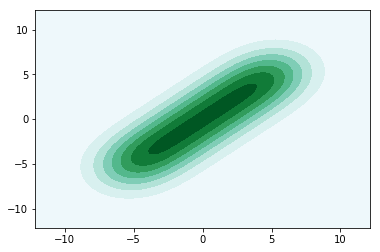

In [40]:
x1min, x1max, x1step = (-6, 6.5, 0.5)
x2min, x2max, x2step = (-6, 6.5, 0.5)
x1_range = np.arange(x1min, x1max, x1step)
x2_range = np.arange(x2min, x2max, x2step)

sns.kdeplot(x1_range,x2_range,shade=True)

<div class="alert alert-success">
Comment on the plot.
</div>